<figure>
<center>
<img src='https://raw.githubusercontent.com/alexsnowschool/TensorFlow-Beginner/main/project_img.png' width = '800px'/>
</center>        
</figure>

#Exploring Fashion MNIST Dataset

<figure>
<center>
<img src='https://www.researchgate.net/profile/Greeshma_K_V/publication/340299295/figure/fig1/AS:875121904476163@1585656729996/Fashion-MNIST-Dataset-Images-with-Labels-and-Description-II-LITERATURE-REVIEW-In-image.jpg' width = '500px'/>
</center>        
</figure>

**Load Dataset**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist 
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

**Shape of data**

In [22]:
print('X_train shape: ', x_train.shape)
print('Y_train shape: ', y_train.shape)
print('X_test shape: ', x_test.shape)
print('Y_test shape: ', y_test.shape)
print('Labels of Train Data: ', set(y_train))
print('Labels of  Test Data: ', set(y_test))

X_train shape:  (60000, 28, 28)
Y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
Y_test shape:  (10000,)
Labels of Train Data:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Labels of  Test Data:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


**Plotting image with matplotlib**

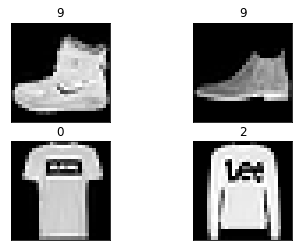

In [21]:
# plotting image 
from matplotlib import pyplot as plt
%matplotlib inline

images = [x_train[0], x_test[0], x_train[1], x_test[1]]
titles = [y_train[0], y_test[0], y_train[1], y_test[1]]

for i in range(4):
  plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])

plt.show()
# label 9 = ankle boots, label 0 = tshirt/top, label 2 = pullover

#Training Model on Fashion MNIST Using 3 layers (Input Layer, hidden layer, output layer) without using CNN

In [8]:
# import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

# load dataset
mnist_fashion = tf.keras.datasets.fashion_mnist
(train_img, train_label), (test_img, test_label) = mnist_fashion.load_data()

# normalize data
train_img = train_img / 255.0
test_img = test_img / 255.0

# build model
model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation=tf.nn.relu),
        Dense(10, activation=tf.nn.softmax)
])

# complie model 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit model
model.fit(train_img, train_label, epochs=5)

# evaluation 
test_loss = model.evaluate(test_img, test_label)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4966 - accuracy: 0.8264
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3762 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3386 - accuracy: 0.8759
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3124 - accuracy: 0.8853
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3470 - accuracy: 0.8753


**Without CNN, we get 89% accuracy on training and 87% accuracy on testing**

#Improving Computer Vision Accuracy using CNN
 

In [ ]:
# import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

# load dataset
mnist_fashion = tf.keras.datasets.fashion_mnist
(train_img, train_label), (test_img, test_label) = mnist_fashion.load_data()

# normalize data
train_img = train_img.reshape(60000, 28, 28, 1)
train_img = train_img / 255.0

test_img = test_img.reshape(10000, 28, 28, 1)
test_img = test_img / 255.0

# build model
model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation=tf.nn.relu),
        Dense(10, activation=tf.nn.softmax)
])

model.summary()

# complie model 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit model
model.fit(train_img, train_label, epochs=5)

# evaluation 
test_loss = model.evaluate(test_img, test_label)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

**Without CNN, we get 89% accuracy on training and 87% accuracy on testing**

**With CNN, we get 92% accuracy on training and 90% accuracy on testing**